In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
S22 = pd.read_csv('PLAYER_DATA/season_22.csv')
S23 = pd.read_csv('PLAYER_DATA/season_23.csv')
S24 = pd.read_csv('PLAYER_DATA/season_24.csv')
S25 = pd.read_csv('PLAYER_DATA/season_25.csv')
data = pd.concat([S22, S23, S24], ignore_index=True)
data.drop(columns=['Unnamed: 0'], inplace=True)
data


,PLAYER_NAME,PLAYER_ID,MATCHUP,TEAM_ABBREVIATION,TEAM_ID,OPP_ABBREVIATION,HOME_GAME,AWAY_GAME,GAME_ID,GAME_DATE,...,OPP_DEF_RATING,OPP_STL,OPP_BLK,OPP_REB,OPP_FG_PCT,OPP_TEAM_ID,TEAM_OFF_RATING,TEAM_PACE,GAME_PACE,OPP_PACE
0,Russell Westbrook,201566,LAL vs. GSW,LAL,1610612747,GSW,1,0,22100002,2021-10-19,...,98.821082,9.0,2.0,50.0,0.440860,1610612744,98.821082,115.36,114.78,114.20
1,Kevon Looney,1626172,GSW @ LAL,GSW,1610612744,LAL,0,1,22100002,2021-10-19,...,105.954466,7.0,4.0,45.0,0.473684,1610612747,105.954466,114.20,114.78,115.36
2,Otto Porter Jr.,203490,GSW @ LAL,GSW,1610612744,LAL,0,1,22100002,2021-10-19,...,105.954466,7.0,4.0,45.0,0.473684,1610612747,105.954466,114.20,114.78,115.36
3,Gary Payton II,1627780,GSW @ LAL,GSW,1610612744,LAL,0,1,22100002,2021-10-19,...,105.954466,7.0,4.0,45.0,0.473684,1610612747,105.954466,114.20,114.78,115.36
4,Kent Bazemore,203145,LAL vs. GSW,LAL,1610612747,GSW,1,0,22100002,2021-10-19,...,98.821082,9.0,2.0,50.0,0.440860,1610612744,98.821082,115.36,114.78,114.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78330,Johnny Juzang,1630548,UTA @ GSW,UTA,1610612762,GSW,0,1,22301198,2024-04-14,...,114.806017,10.0,6.0,42.0,0.478723,1610612744,114.806017,101.04,101.08,101.12
78331,Omer Yurtseven,1630209,UTA @ GSW,UTA,1610612762,GSW,0,1,22301198,2024-04-14,...,114.806017,10.0,6.0,42.0,0.478723,1610612744,114.806017,101.04,101.08,101.12
78332,Luka Samanic,1629677,UTA @ GSW,UTA,1610612762,GSW,0,1,22301198,2024-04-14,...,114.806017,10.0,6.0,42.0,0.478723,1610612744,114.806017,101.04,101.08,101.12
78333,Darius Bazley,1629647,UTA @ GSW,UTA,1610612762,GSW,0,1,22301198,2024-04-14,...,114.806017,10.0,6.0,42.0,0.478723,1610612744,114.806017,101.04,101.08,101.12


In [6]:
data.columns

Index(['PLAYER_NAME', 'PLAYER_ID', 'MATCHUP', 'TEAM_ABBREVIATION', 'TEAM_ID',
       'OPP_ABBREVIATION', 'HOME_GAME', 'AWAY_GAME', 'GAME_ID', 'GAME_DATE',
       'WL', 'MIN', 'PTS', 'AST', 'REB', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'STL', 'BLK',
       'TOV', 'PF', 'PLUS_MINUS', 'FANTASY_PTS', 'PointsPerShot',
       'START_POSITION', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'OREB_PCT',
       'DREB_PCT', 'REB_PCT', 'AST_PCT', 'AST_TOV', 'USG_PCT', 'TS_PCT',
       'E_PACE', 'PACE', 'PIE', 'PACE_PER40', 'TEAM_GAME_DATE', 'TEAM_MIN',
       'TEAM_FGM', 'TEAM_FGA', 'TEAM_FG_PCT', 'TEAM_FG3M', 'TEAM_FG3A',
       'TEAM_FG3_PCT', 'TEAM_FTM', 'TEAM_FTA', 'TEAM_FT_PCT', 'TEAM_OREB',
       'TEAM_DREB', 'TEAM_REB', 'TEAM_AST', 'TEAM_STL', 'TEAM_BLK', 'TEAM_TOV',
       'TEAM_PF', 'TEAM_PTS', 'OPP_DEF_RATING', 'OPP_STL', 'OPP_BLK',
       'OPP_REB', 'OPP_FG_PCT', 'OPP_TEAM_ID', 'TEAM_OFF_RATING', 'TEAM_PACE',
       'GAME_PACE', 'O

In [27]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for training
features = ['PLAYER_ID','TEAM_ID','HOME_GAME','AWAY_GAME','MIN','FGA','FG3A', 'FTA', 'OFF_RATING', 'TEAM_PACE', 'OPP_PACE']
target = 'PTS'

X_train = data[features]
y_train = data[target]

X_test = S25[features]
y_test = S25[target]

# Initialize the XGBoost model
XGB_model = xgb.XGBRegressor()
XGB_model.fit(X_train, y_train)
pred = XGB_model.predict(X_test)

print(f"R-squared: {r2_score(y_test,pred)}")




R-squared: 0.8662026524543762


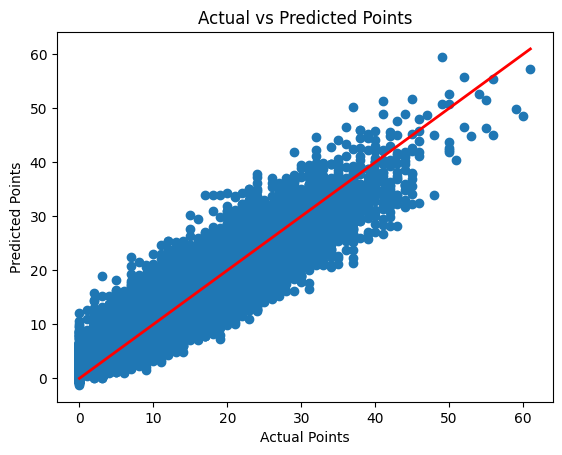

In [34]:
plt.scatter(y_test, pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points')
plt.show()


In [41]:
results = {
    "NAME": S25['PLAYER_NAME'],
    "ACTUAL": y_test,
    "PREDICTED": pred,
    "DIFF": abs(y_test - pred)
}
results =pd.DataFrame(results)
print("The model predicted under the actual number of points", round(sum(results['ACTUAL'] > results['PREDICTED'])/len(results), 2), "of the time")
print("The model predicted over the actual number of points", round(sum(results['ACTUAL'] < results['PREDICTED'])/len(results), 2), "of the time")


The model predicted under the actual number of points 0.48 of the time
The model predicted over the actual number of points 0.52 of the time


In [42]:
results 

,NAME,ACTUAL,PREDICTED,DIFF
0,Karl-Anthony Towns,12,11.672256,0.327744
1,Dalton Knecht,5,4.807909,0.192091
2,Jaden McDaniels,6,5.770131,0.229869
3,Naz Reid,12,12.621434,0.621434
4,Nickeil Alexander-Walker,14,10.551697,3.448303
...,...,...,...,...
26301,Ron Harper Jr.,4,11.103948,7.103948
26302,Jamaree Bouyea,15,18.149197,3.149197
26303,Malik Beasley,23,14.923841,8.076159
26304,Tolu Smith,14,14.210155,0.210155


In [29]:
data.describe()

,PLAYER_ID,TEAM_ID,HOME_GAME,AWAY_GAME,GAME_ID,MIN,PTS,AST,REB,FGM,...,OPP_DEF_RATING,OPP_STL,OPP_BLK,OPP_REB,OPP_FG_PCT,OPP_TEAM_ID,TEAM_OFF_RATING,TEAM_PACE,GAME_PACE,OPP_PACE
count,7.833500e+04,7.833500e+04,78335.000000,78335.000000,7.833500e+04,78335.000000,78335.000000,78335.000000,78335.000000,78335.000000,...,78335.000000,78335.000000,78335.000000,78335.000000,78335.000000,7.833500e+04,78335.000000,78335.000000,78335.000000,78335.000000
mean,1.263932e+06,1.610613e+09,0.501181,0.498819,2.220107e+07,22.758767,10.661926,2.406651,4.127363,3.918159,...,112.237015,7.474462,4.826489,43.802004,0.471024,1.610613e+09,112.237015,100.989104,100.988806,100.988508
std,6.247610e+05,8.632387e+00,0.500002,0.500002,8.182088e+04,10.886284,8.864052,2.621800,3.452108,3.276838,...,11.985357,2.849271,2.488864,6.664156,0.056104,8.661796e+00,11.985357,5.466115,5.270089,5.458999
min,2.207000e+03,1.610613e+09,0.000000,0.000000,2.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,...,74.009996,0.000000,0.000000,23.000000,0.277108,1.610613e+09,74.009996,82.280000,84.660000,82.280000
25%,2.040010e+05,1.610613e+09,0.000000,0.000000,2.210092e+07,15.000000,4.000000,0.000000,2.000000,1.000000,...,104.046243,5.000000,3.000000,39.000000,0.432099,1.610613e+09,104.046243,97.320000,97.450000,97.320000
50%,1.629002e+06,1.610613e+09,1.000000,0.000000,2.220062e+07,24.000000,9.000000,2.000000,3.000000,3.000000,...,111.973392,7.000000,5.000000,44.000000,0.470588,1.610613e+09,111.973392,100.680000,100.640000,100.680000
75%,1.630202e+06,1.610613e+09,1.000000,1.000000,2.230032e+07,32.000000,16.000000,4.000000,6.000000,6.000000,...,120.341615,9.000000,6.000000,48.000000,0.510417,1.610613e+09,120.341615,104.120000,104.040000,104.120000
max,1.642013e+06,1.610613e+09,1.000000,1.000000,2.230123e+07,57.000000,73.000000,23.000000,31.000000,25.000000,...,152.452026,21.000000,19.000000,74.000000,0.686747,1.610613e+09,152.452026,132.040000,131.980000,132.040000


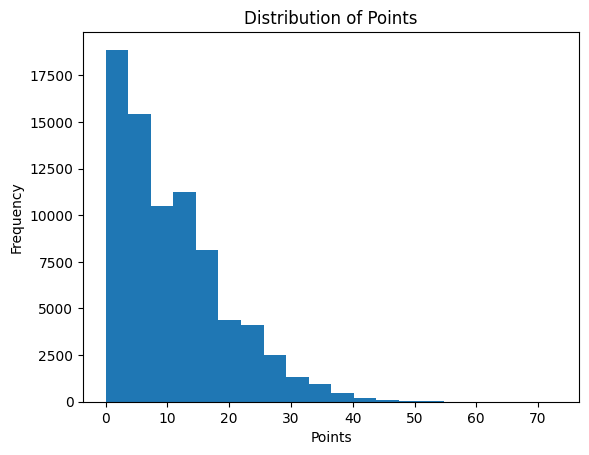

In [30]:
plt.hist(data['PTS'], bins=20)
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Distribution of Points')
plt.show()

